In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import sys
from scipy.stats import norm
from BHDVCS_torch import TBHDVCS

tb = TBHDVCS()
f = tb.TotalUUXS_curve_fit

dats = pd.read_csv('dvcs_psuedo.csv')

n = np.array(dats['#Set'])
ind = np.array(dats['index'])
k = np.array(dats['k'])
qq = np.array(dats['QQ'])
xb = np.array(dats['x_b'])
t = np.array(dats['t'])
phi = np.array(dats['phi_x'])
ydat = np.array(dats['F'])
errF = np.array(dats['errF'])
F1 = np.array(dats['F1'])
F2 = np.array(dats['F2'])
const = np.array(dats['dvcs'])
ReH_target = np.array(dats['ReH']) 
ReE_target = np.array(dats['ReE']) 
ReHT_target = np.array(dats['ReHtilde'])

set0 = []
set1 = []
set2 = []
set3 = []
set4 = []
set5 = []
set6 = []
set7 = []
set8 = []
allsetsReH = []
allsetsReE = []
allsetsReHT = []

sets = [set0, set1, set2, set3, set4, set5, set6, set7, set8]


original_stdout = sys.stdout

with open('all_reps2.txt', 'r') as f:
    for line in f:
        if len(line.split()) > 1:
            setnum = int(line.split()[0])
            sets[setnum].append([float(line.split()[1]), float(line.split()[2]), float(line.split()[3])])
            allsetsReH.append((float(line.split()[1])-ReH_target[36*setnum])/ReH_target[36*setnum])
            allsetsReE.append((float(line.split()[2])-ReE_target[36*setnum])/ReE_target[36*setnum])
            allsetsReHT.append((float(line.split()[3])-ReHT_target[36*setnum])/ReHT_target[36*setnum])


In [61]:
def getDists(setnum): 
    setdat = np.asarray(sets[setnum])
    d = 36*setnum
    ReHs = np.transpose(setdat)[0]
    ReEs = np.transpose(setdat)[1]
    ReHTs = np.transpose(setdat)[2]

    meanReH = np.mean(ReHs)
    varReH = np.var(ReHs)
    meanReE = np.mean(ReEs)
    varReE = np.var(ReEs)
    meanReHT = np.mean(ReHTs)
    varReHT = np.var(ReHTs)

    m,sReH = norm.fit(ReHs)
    plt.hist(ReHs, bins=100, range = (meanReH - 3*np.sqrt(varReH), meanReH + 3*np.sqrt(varReH)))
    plt.vlines(meanReH, 0, 30, 'r')
    plt.vlines(ReH_target[d], 0, 30, 'g')
    plt.show()
    print('True ReH: %.2f' % (ReH_target[d]))
    print('Mean ReH: %.2f (%.2f%% Error)' % (meanReH, abs(100*(ReH_target[d]-meanReH)/ReH_target[d])))
    print('Sigma ReH: %2f' % (sReH))

    m,sReE = norm.fit(ReEs)
    plt.hist(ReEs, bins=100, range = (meanReE - 3*np.sqrt(varReE), meanReE + 3*np.sqrt(varReE)))
    plt.vlines(meanReE, 0, 30, 'r')
    plt.vlines(ReE_target[d], 0, 30, 'g')
    plt.show()
    print('True ReE: %.2f' % (ReE_target[d]))
    print('Mean ReE: %.2f (%.2f%% Error)' % (meanReE, abs(100*(ReE_target[d]-meanReE)/ReE_target[d])))
    print('Sigma ReH: %2f' % (sReE))

    m,sReHT = norm.fit(ReHTs)
    plt.hist(ReHTs, bins=100, range = (meanReHT - 3*np.sqrt(varReHT), meanReHT + 3*np.sqrt(varReHT)))
    plt.vlines(meanReHT, 0, 30, 'r')
    plt.vlines(ReHT_target[d], 0, 30, 'g')
    plt.show()
    print('True ReHT: %.2f' % (ReHT_target[d]))
    print('Mean ReHT: %.2f (%.2f%% Error)' % (meanReHT, abs(100*(ReHT_target[d]-meanReHT)/ReHT_target[d])))
    print('Sigma ReHT: %2f' % (sReHT))

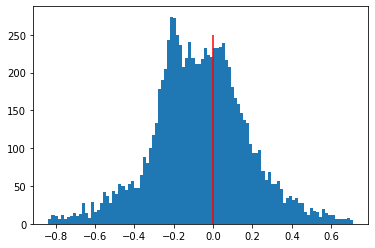

Average Fit ReH over Target ReH: -0.064
Sigma ReH: 0.257755


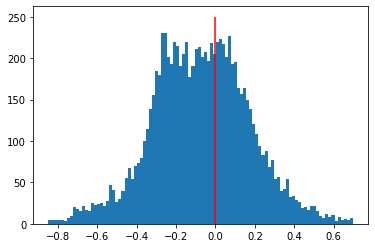

Average Fit ReH over Target ReE: -0.075
Sigma ReE: 0.257486


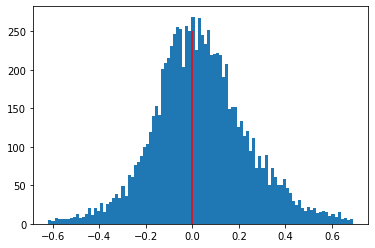

Average Fit ReH over Target ReHT: 0.036
Sigma ReHT: 0.217977


In [60]:
ReHs = allsetsReH
ReEs = allsetsReE
ReHTs = allsetsReHT

meanReH = np.mean(ReHs)
varReH = np.var(ReHs)
meanReE = np.mean(ReEs)
varReE = np.var(ReEs)
meanReHT = np.mean(ReHTs)
varReHT = np.var(ReHTs)

m,sReH = norm.fit(ReHs)
plt.hist(ReHs, bins=100, range = (meanReH - 3*np.sqrt(varReH), meanReH + 3*np.sqrt(varReH)))
plt.vlines(0, 0, 250, 'r')
plt.show()
print('Average Fit ReH over Target ReH: %.3f' % (meanReH))
print('Sigma ReH: %2f' % (sReH))

m,sReE = norm.fit(ReEs)
plt.hist(ReEs, bins=100, range = (meanReE - 3*np.sqrt(varReE), meanReE + 3*np.sqrt(varReE)))
plt.vlines(0, 0, 250, 'r')
plt.show()
print('Average Fit ReH over Target ReE: %.3f' % (meanReE))
print('Sigma ReE: %2f' % (sReE))

m,sReHT = norm.fit(ReHTs)
plt.hist(ReHTs, bins=100, range = (meanReHT - 3*np.sqrt(varReHT), meanReHT + 3*np.sqrt(varReHT)))
plt.vlines(0, 0, 250, 'r')
plt.show()
print('Average Fit ReH over Target ReHT: %.3f' % (meanReHT))
print('Sigma ReHT: %2f' % (sReHT))

## Set 0

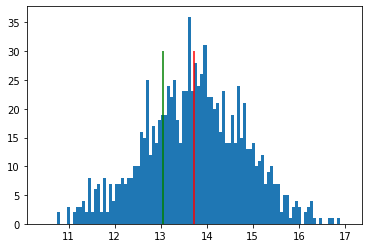

True ReH: 13.06
Mean ReH: 13.73 (5.18% Error)
Sigma ReH: 1.101786


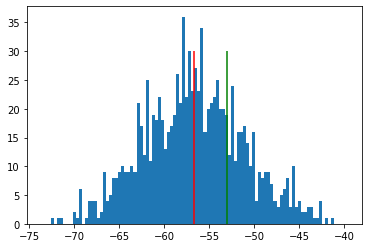

True ReE: -53.06
Mean ReE: -56.64 (6.75% Error)
Sigma ReH: 5.643754


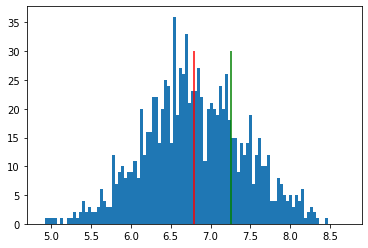

True ReHT: 7.25
Mean ReHT: 6.80 (6.29% Error)
Sigma ReHT: 0.636681


In [62]:
getDists(0)

## Set 1

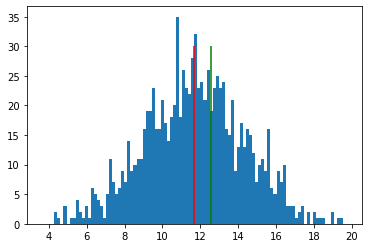

True ReH: 12.55
Mean ReH: 11.69 (6.93% Error)
Sigma ReH: 2.682727


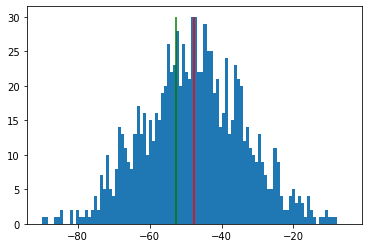

True ReE: -52.55
Mean ReE: -47.55 (9.52% Error)
Sigma ReH: 14.102813


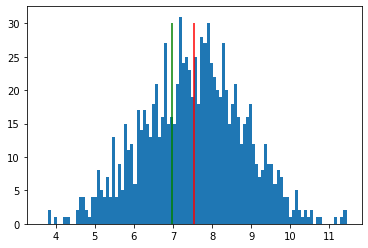

True ReHT: 6.97
Mean ReHT: 7.55 (8.22% Error)
Sigma ReHT: 1.296748


In [63]:
getDists(1)

## Set 2

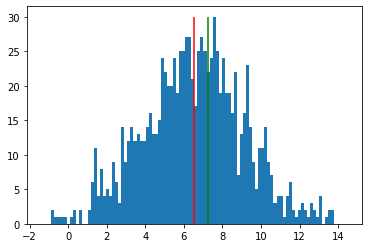

True ReH: 7.22
Mean ReH: 6.54 (9.46% Error)
Sigma ReH: 2.630998


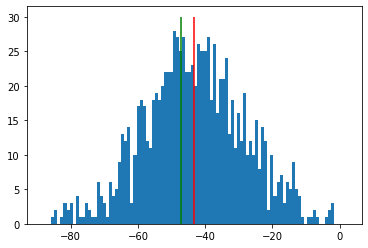

True ReE: -47.22
Mean ReE: -43.22 (8.48% Error)
Sigma ReH: 15.091114


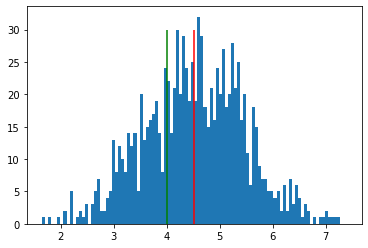

True ReHT: 4.01
Mean ReHT: 4.52 (12.66% Error)
Sigma ReHT: 0.957782


In [64]:
getDists(2)

## Set 3

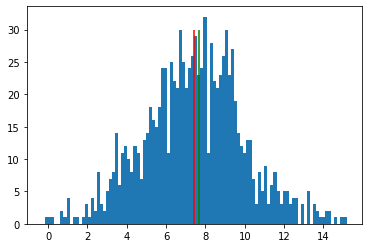

True ReH: 7.65
Mean ReH: 7.43 (2.86% Error)
Sigma ReH: 2.579284


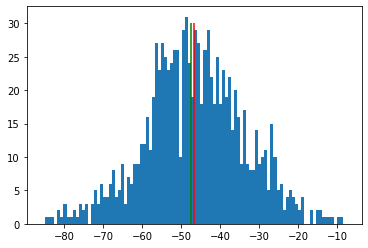

True ReE: -47.65
Mean ReE: -46.67 (2.06% Error)
Sigma ReH: 13.014765


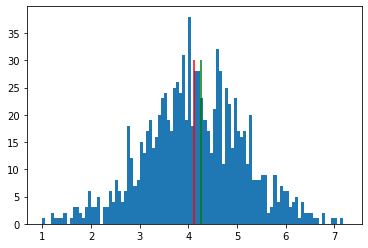

True ReHT: 4.25
Mean ReHT: 4.12 (3.01% Error)
Sigma ReHT: 1.042199


In [65]:
getDists(3)

## Set 4

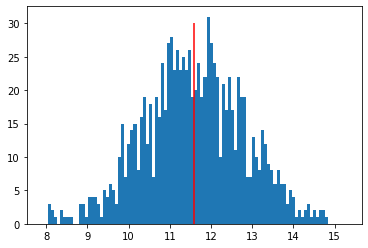

True ReH: 12.55
Mean ReH: 11.59 (7.65% Error)
Sigma ReH: 1.231093


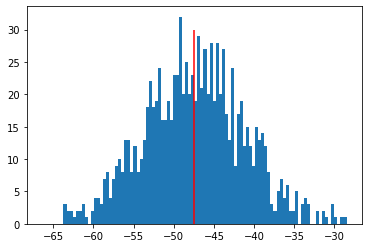

True ReE: -52.55
Mean ReE: -47.44 (9.73% Error)
Sigma ReH: 6.315369


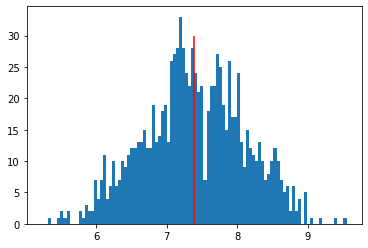

True ReHT: 6.97
Mean ReHT: 7.39 (6.00% Error)
Sigma ReHT: 0.719295


In [51]:
getDists(4)

## Set 5

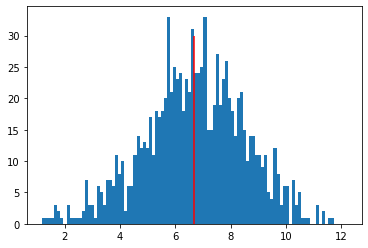

True ReH: 7.22
Mean ReH: 6.69 (7.36% Error)
Sigma ReH: 1.834488


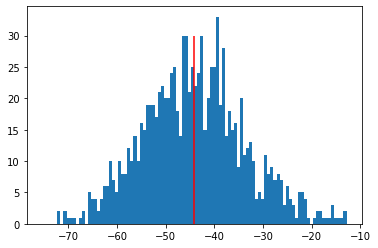

True ReE: -47.22
Mean ReE: -44.13 (6.56% Error)
Sigma ReH: 10.422852


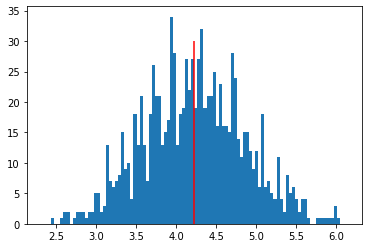

True ReHT: 4.01
Mean ReHT: 4.23 (5.37% Error)
Sigma ReHT: 0.633418


In [52]:
getDists(5)

## Set 6

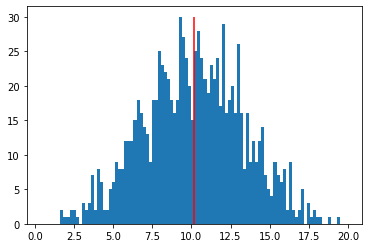

True ReH: 11.74
Mean ReH: 10.19 (13.21% Error)
Sigma ReH: 3.240054


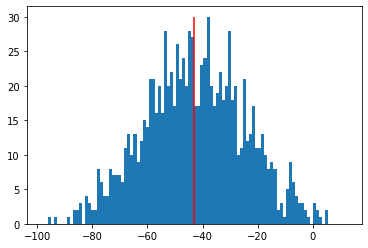

True ReE: -51.74
Mean ReE: -42.97 (16.95% Error)
Sigma ReH: 18.437086


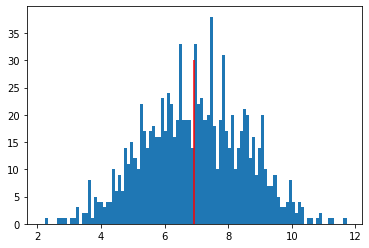

True ReHT: 6.52
Mean ReHT: 6.94 (6.36% Error)
Sigma ReHT: 1.594173


In [53]:
getDists(6)

## Set 7

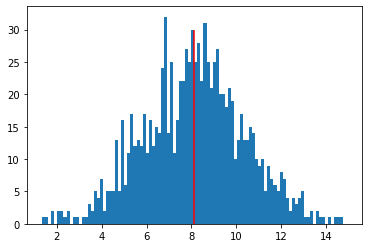

True ReH: 7.65
Mean ReH: 8.13 (6.27% Error)
Sigma ReH: 2.261585


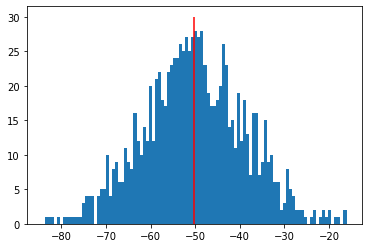

True ReE: -47.65
Mean ReE: -50.18 (5.31% Error)
Sigma ReH: 11.376090


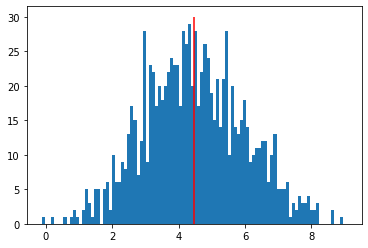

True ReHT: 4.25
Mean ReHT: 4.47 (5.21% Error)
Sigma ReHT: 1.527616


In [54]:
getDists(7)

## Set 8

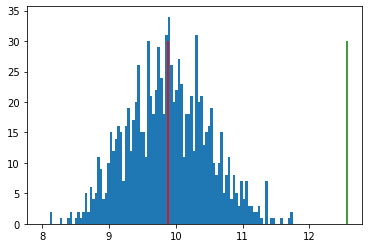

True ReH: 12.55
Mean ReH: 9.88 (21.33% Error)
Sigma ReH: 0.625082


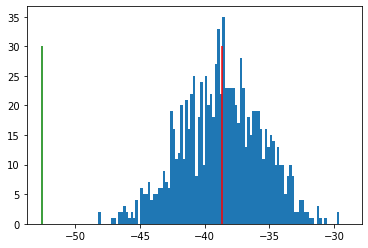

True ReE: -52.55
Mean ReE: -38.62 (26.51% Error)
Sigma ReH: 3.199023


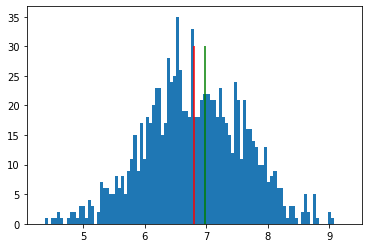

True ReHT: 6.97
Mean ReHT: 6.81 (2.40% Error)
Sigma ReHT: 0.823573


In [66]:
getDists(8)